# Содиков Фарход, ПИ19-1, Парная линейная регрессия.

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List, Union
from abc import ABCMeta
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
mgnt = pd.read_csv("./data/MGNT_101001_171001.txt")
gazp = pd.read_csv("./data/GAZP_101001_171001.txt")
usdRub = pd.read_csv("./data/USDRUB_101001_171001.txt")


In [3]:
mgnt.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MGNT,D,20101001,0,3800.00,12669
1,MGNT,D,20101004,0,3746.97,3899
2,MGNT,D,20101005,0,3669.99,22660
3,MGNT,D,20101006,0,3664.87,1302
4,MGNT,D,20101007,0,3611.27,7101


In [4]:
gazp.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,GAZP,D,20101001,0,160.54,60923751
1,GAZP,D,20101004,0,161.99,61902787
2,GAZP,D,20101005,0,162.44,61546943
3,GAZP,D,20101006,0,163.00,67921495
4,GAZP,D,20101007,0,162.49,43529081


In [5]:
usdRub.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,USDRUB,D,20101001,0,30.47,0
1,USDRUB,D,20101002,0,30.41,0
2,USDRUB,D,20101004,0,30.45,0
3,USDRUB,D,20101005,0,30.02,0
4,USDRUB,D,20101006,0,29.78,0


In [6]:
mgnt.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

In [7]:
gazp.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

In [8]:
usdRub.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

In [9]:
data = mgnt.merge(gazp, on="<DATE>").merge(usdRub, on="<DATE>")

In [10]:
data.shape

(1757, 16)

In [11]:
data.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y,<TICKER>,<PER>,<TIME>,<CLOSE>,<VOL>
0,MGNT,D,20101001,0,3800.00,12669,GAZP,D,0,160.54,60923751,USDRUB,D,0,30.47,0
1,MGNT,D,20101004,0,3746.97,3899,GAZP,D,0,161.99,61902787,USDRUB,D,0,30.45,0
2,MGNT,D,20101005,0,3669.99,22660,GAZP,D,0,162.44,61546943,USDRUB,D,0,30.02,0
3,MGNT,D,20101006,0,3664.87,1302,GAZP,D,0,163.00,67921495,USDRUB,D,0,29.78,0
4,MGNT,D,20101007,0,3611.27,7101,GAZP,D,0,162.49,43529081,USDRUB,D,0,29.79,0


In [12]:
Y_mgnt = data["<CLOSE>_x"]
Y_gazp = data["<CLOSE>_y"]
Y_usdRub = data["<CLOSE>_y"]

In [13]:
X_mgnt = mgnt.drop("<CLOSE>", axis=1)
X_gazp = gazp.drop("<CLOSE>", axis=1)
X_usdRub = usdRub.drop("<CLOSE>", axis=1)

In [14]:
X_mgnt.head()
# X_gazp.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<VOL>
0,MGNT,D,20101001,0,12669
1,MGNT,D,20101004,0,3899
2,MGNT,D,20101005,0,22660
3,MGNT,D,20101006,0,1302
4,MGNT,D,20101007,0,7101


In [15]:
class RegressionSample(metaclass=ABCMeta):
    @staticmethod
    def get_sample(X: pd.Series, y: pd.Series) -> Tuple[pd.Series, pd.Series]:
        pass


class RegressionRandomSample(RegressionSample):
    @staticmethod
    def get_sample(X: pd.Series, y: pd.Series) -> Tuple[pd.Series, pd.Series]:
        f = random.randrange(0, len(X))
        r = random.randrange(f, len(X))
        return X[f:r], y[f:r]


class Regression:
    def __init__(self, sample: Union[RegressionSample, None] = None):
        self.b0 = 0
        self.b1 = 0
        self.__max = 0
        self.__min = 0
        self.sample = sample

    def predict(self, X: Union[np.ndarray, pd.Series]) -> Union[np.ndarray, pd.Series]:
        return self.b0 + self.b1 * ((X - self.__min) / (self.__max - self.__min))

    def error(self, X: pd.Series, y: pd.Series) -> int:
        return sum((self.predict(X) - y) ** 2) / (2 * len(X))

    def fit(self, X: pd.Series, y: pd.Series) -> Tuple[range, List[int]]:
        if self.sample is not None:
            X, y = self.sample.get_sample(X, y)
        alpha = 0.1
        errors, steps = [], range(898)
        for step in steps:
            self.__max = np.max(X)
            self.__min = np.min(X)

            dJ0 = sum(self.predict(X) - y) / len(X)
            dJ1 = sum(
                (self.predict(X) - y) * ((X - self.__min) / (self.__max - self.__min))
            ) / len(X)

            self.b0 = self.b0 - alpha * dJ0
            self.b1 = self.b1 - alpha * dJ1

            errors.append(self.error(X, y))

            if step != 0 and errors[-2] < (errors[-1] - 2):
                alpha = alpha * 0.1
        return steps, errors

# mgnt x gazp

Используется случайный кусок данных для обучения RegressionRandomSample()

In [16]:
model = Regression(sample=RegressionRandomSample())
steps, errors = model.fit(Y_mgnt, Y_gazp)
model.predict(Y_mgnt)

0       177.115375
1       177.396986
2       177.805783
3       177.832972
4       178.117611
           ...    
1752    143.712809
1753    143.325148
1754    143.718119
1755    143.659704
1756    143.739361
Name: <CLOSE>_x, Length: 1757, dtype: float64

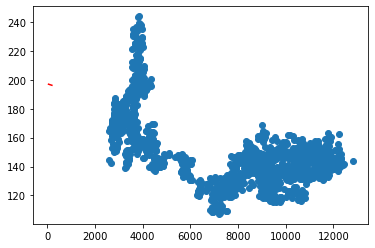

In [17]:
X0 = np.linspace(60, 200, 100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(Y_mgnt, Y_gazp)
plt.plot(X0, Y0, "r")
plt.show()

In [18]:
print(f"{model.error(Y_mgnt, Y_gazp)=}")

model.error(Y_mgnt, Y_gazp)=201.7438776438213


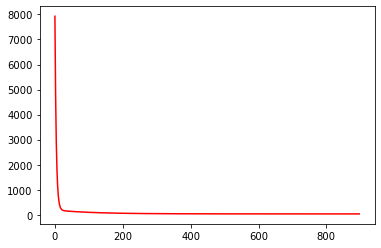

In [19]:
plt.figure()
plt.plot(steps, errors, 'r')
plt.show()

# mgnt x usdRub

Используется случайный кусок данных для обучения RegressionRandomSample()

In [20]:
model = Regression(sample=RegressionRandomSample())
steps, errors = model.fit(Y_mgnt, Y_usdRub)
model.predict(Y_mgnt)

0       147.277576
1       147.326179
2       147.396732
3       147.401424
4       147.450549
           ...    
1752    141.512729
1753    141.445824
1754    141.513646
1755    141.503564
1756    141.517312
Name: <CLOSE>_x, Length: 1757, dtype: float64

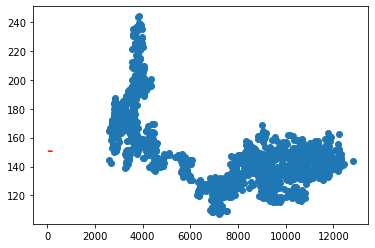

In [21]:
X0 = np.linspace(60, 200, 100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(Y_mgnt, Y_usdRub)
plt.plot(X0, Y0, "r")
plt.show()

In [22]:
print(f"{model.error(Y_mgnt, Y_gazp)=}")

model.error(Y_mgnt, Y_gazp)=283.29922144404617


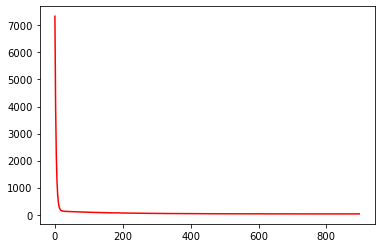

In [23]:
plt.figure()
plt.plot(steps, errors, color = 'r')
plt.show()

# sklearn

In [24]:
Y_mgnt_1 = data["<CLOSE>_x"].values
Y_gazp_1 = data["<CLOSE>_y"].values
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=110, tol=1e-1))
reg.fit(Y_mgnt_1.reshape(-1, 1), Y_gazp_1)
answers = reg.predict(Y_gazp_1.reshape(-1, 1))
print(answers)

[187.46854744 187.46142087 187.45920917 ... 187.65550928 187.65698374
 187.6584582 ]
